In [1]:
import nltk 
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

%cd "/drive/MyDrive/TextMiningProject/"

Mounted at /drive
/drive/MyDrive/TextMiningProject


In [ ]:
!pip3 install --upgrade pandas

In [ ]:
!pip install tweet-preprocessor
!pip install sklearn
!pip install matplotlib
!pip install import_ipynb

!pip install pandas

In [5]:
import sys
import os

py_file_location = "/drive/MyDrive/TextMiningProject/text-preprocessing-techniques"
sys.path.append(os.path.abspath(py_file_location))

In [6]:
import pandas as pd
import random
import seaborn as sn
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import GridSearchCV
#import preprocessor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
import import_ipynb
from Utilities import *
from preprocess import tokenize 

In [10]:
genuine = pd.read_csv("/drive/MyDrive/TextMiningProject/Datasets/datasets_full/ssb_tokenized/tokenized_genuine.txt", header=None).rename({0:"text"}, axis=1)
ssb2 = pd.read_csv("/drive/MyDrive/TextMiningProject/Datasets/datasets_full/ssb_tokenized/tokenized_ssb2.txt", header=None).rename({0:"text"}, axis=1)
ssb3 = pd.read_csv("/drive/MyDrive/TextMiningProject/Datasets/datasets_full/ssb_tokenized/tokenized_ssb3.txt", header=None).rename({0:"text"}, axis=1)


In [35]:
train_1, train_2, test_1, test_2 = generate_train_test(genuine, ssb2, ssb3)


/drive/MyDrive/TextMiningProject/Utilities.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssb2_train["Label"] = "bot"
/drive/MyDrive/TextMiningProject/Utilities.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssb3_train["Label"] = "bot"
/drive/MyDrive/TextMiningProject/Utilities.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [36]:
# Run this cell to downsample

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1)
test_2 = downsample(test_2)

In [37]:
report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,293283,293283,38386,125693
genuine,293283,293283,38386,125693


## Naive Bayes classifier

### SSB_2

In [14]:

pipe = Pipeline([('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])
pipe.fit(train_1["text"].values.astype('U'), train_1["Label"])


Pipeline(steps=[('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])

In [15]:
print(classification_report(test_1["Label"], pipe.predict(test_1["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.80      0.84      0.82     38386
     genuine       0.83      0.79      0.81     38386

    accuracy                           0.82     76772
   macro avg       0.82      0.82      0.82     76772
weighted avg       0.82      0.82      0.82     76772



In [16]:
cm = confusion_matrix(test_1["Label"], pipe.predict(test_1["text"].values.astype('U')), normalize="true")

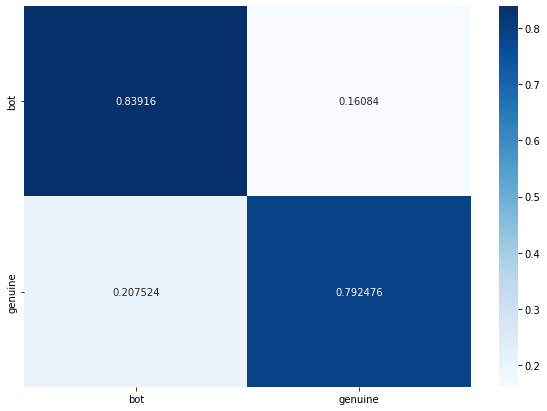

In [17]:
plot_confusion_matrix_custom(cm)

### SSB_3

In [18]:
pipe = Pipeline([('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])


In [19]:

pipe.fit(train_2["text"].values.astype('U'), train_2["Label"])


Pipeline(steps=[('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])

In [20]:
print(classification_report(test_2["Label"], pipe.predict(test_2["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.90      0.98      0.94    125693
     genuine       0.98      0.89      0.93    125693

    accuracy                           0.93    251386
   macro avg       0.94      0.93      0.93    251386
weighted avg       0.94      0.93      0.93    251386



In [21]:
cm = confusion_matrix(test_2["Label"], pipe.predict(test_2["text"].values.astype('U')), normalize="true")

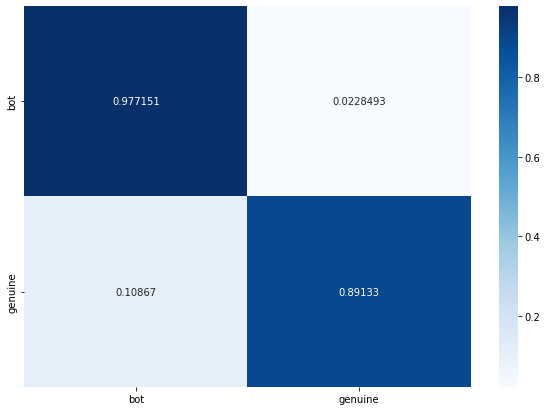

In [22]:
plot_confusion_matrix_custom(cm)

## Baselines

## Dummy Classifier

## SSB_2

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier


dummy = Pipeline([('vectorize ', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])

dummy.fit(train_1["text"].values.astype('U'), train_1["Label"])

print(classification_report(test_1["Label"], dummy.predict(test_1["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.50      0.50      0.50     38386
     genuine       0.50      0.50      0.50     38386

    accuracy                           0.50     76772
   macro avg       0.50      0.50      0.50     76772
weighted avg       0.50      0.50      0.50     76772



In [24]:
cm = confusion_matrix(test_1["Label"], dummy.predict(test_1["text"].values.astype('U')))

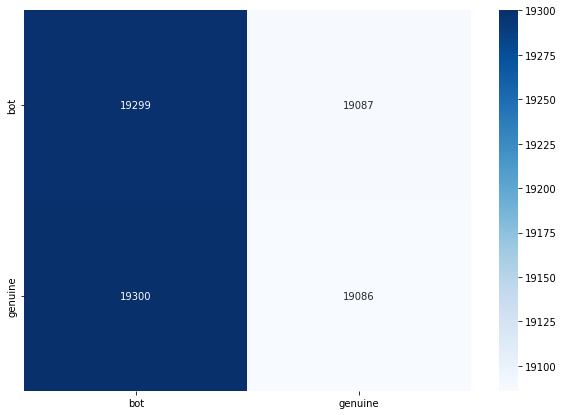

In [25]:
plot_confusion_matrix_custom(cm)

## SBB_3

In [26]:


dummy = Pipeline([('vectorize ', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])

dummy.fit(train_2["text"].values.astype('U'), train_2["Label"])

print(classification_report(test_2["Label"], dummy.predict(test_2["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.50      0.50      0.50    125693
     genuine       0.50      0.50      0.50    125693

    accuracy                           0.50    251386
   macro avg       0.50      0.50      0.50    251386
weighted avg       0.50      0.50      0.50    251386



In [27]:
cm = confusion_matrix(test_2["Label"], dummy.predict(test_2["text"].values.astype('U')), normalize="true")

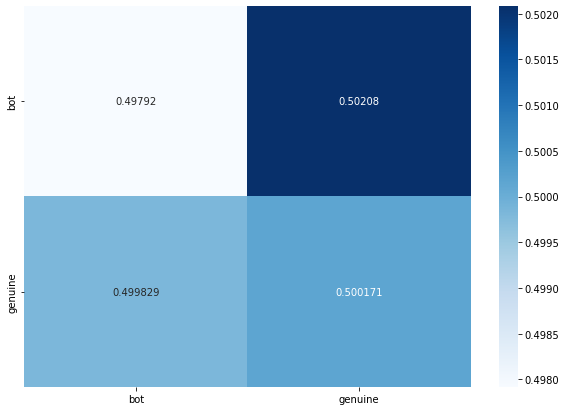

In [28]:
plot_confusion_matrix_custom(cm)

In [29]:
train_1 = downsample_prop(train_1, 0.5)
train_2 = downsample_prop(train_2, 0.5)
test_1 = downsample_prop(test_1, 0.5)
test_2 = downsample_prop(test_2, 0.5)
report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,146829,146829,19164,62938
genuine,146454,146454,19222,62755


In [38]:
 for i in range(4):
  train_1 = downsample_prop(train_1, 0.5)
  train_2 = downsample_prop(train_2, 0.5)
  test_1 = downsample_prop(test_1, 0.5)
  test_2 = downsample_prop(test_2, 0.5)

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1 )
test_2 = downsample(test_2)
report_values(train_1, train_2, test_1, test_2)



,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,18220,18220,2354,7758
genuine,18220,18220,2354,7758


In [39]:
 for i in range(2):
  train_1 = downsample_prop(train_1, 0.5)
  train_2 = downsample_prop(train_2, 0.5)
  test_1 = downsample_prop(test_1, 0.5)
  test_2 = downsample_prop(test_2, 0.5)

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1 )
test_2 = downsample(test_2)
report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,4501,4501,587,1919
genuine,4501,4501,587,1919


In [40]:
 for i in range(2):
  train_1 = downsample_prop(train_1, 0.5)
  train_2 = downsample_prop(train_2, 0.5)
  test_1 = downsample_prop(test_1, 0.5)
  test_2 = downsample_prop(test_2, 0.5)

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1 )
test_2 = downsample(test_2)
report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,1111,1111,133,453
genuine,1111,1111,133,453


## Grid Search with NB classifier

## SSB2

In [41]:
# how to change scoring? 

parameters = {'vectorize __binary':(True, False), 'vectorize __ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }

clf = GridSearchCV(pipe, parameters, scoring = "f1_weighted", cv = 5, refit = True, verbose=2, n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

         bot       0.62      0.72      0.67       133
     genuine       0.67      0.56      0.61       133

    accuracy                           0.64       266
   macro avg       0.65      0.64      0.64       266
weighted avg       0.65      0.64      0.64       266



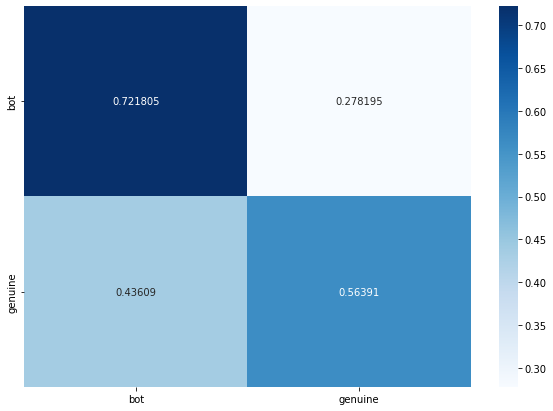

In [42]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [43]:

parameters = {'vectorize __binary':(True, False), 'vectorize __ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }

clf = GridSearchCV(pipe, parameters, scoring = "f1_weighted", cv = 5, refit = True, verbose=2, n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

         bot       0.76      0.91      0.83       453
     genuine       0.89      0.71      0.79       453

    accuracy                           0.81       906
   macro avg       0.82      0.81      0.81       906
weighted avg       0.82      0.81      0.81       906



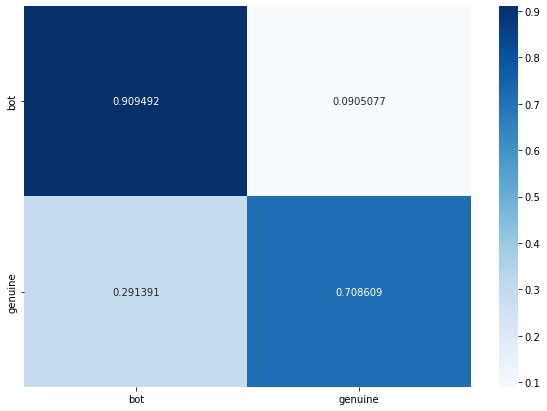

In [44]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Logistic regression 

## SSB2

In [45]:
from sklearn.linear_model import LogisticRegression

GBC = Pipeline([('vectorize ', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])

parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 1]}

#scor = {"F1": "f1"}


clf = GridSearchCV(GBC, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.73      0.62      0.67       133
     genuine       0.67      0.77      0.72       133

    accuracy                           0.70       266
   macro avg       0.70      0.70      0.70       266
weighted avg       0.70      0.70      0.70       266



In [ ]:
clf.best_estimator_

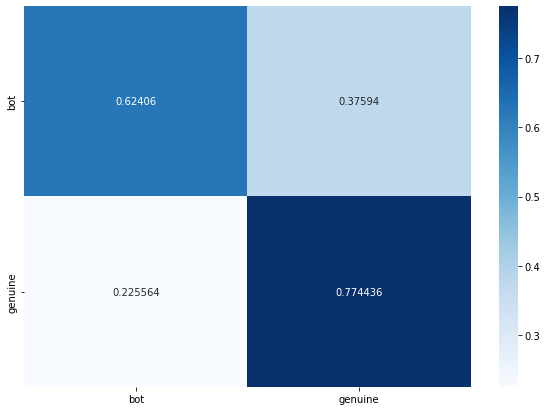

In [46]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [47]:
from sklearn.linear_model import LogisticRegression

GBC = Pipeline([('vectorize ', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])

parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 1]}

#scor = {"F1": "f1"}


clf = GridSearchCV(GBC, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.90      0.83      0.86       453
     genuine       0.85      0.90      0.87       453

    accuracy                           0.87       906
   macro avg       0.87      0.87      0.87       906
weighted avg       0.87      0.87      0.87       906



In [ ]:
clf.best_estimator_

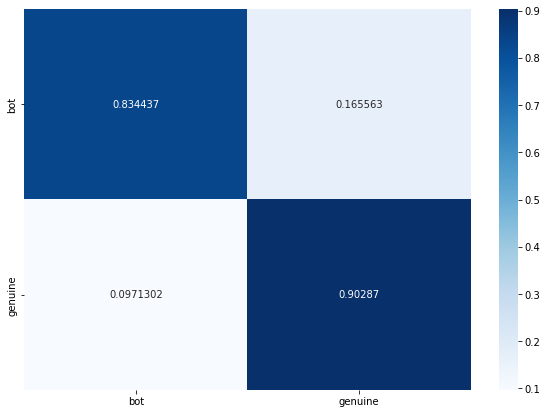

In [48]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Decision Trees 

## SSB2

In [49]:
from sklearn.tree import DecisionTreeClassifier

DT = Pipeline([('vectorize ', CountVectorizer()), ('DT', DecisionTreeClassifier())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "DT__max_depth" : [30, 60, 120]}



clf = GridSearchCV(DT, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.72      0.49      0.58       133
     genuine       0.61      0.81      0.70       133

    accuracy                           0.65       266
   macro avg       0.67      0.65      0.64       266
weighted avg       0.67      0.65      0.64       266



In [50]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('DT', DecisionTreeClassifier(max_depth=120))])

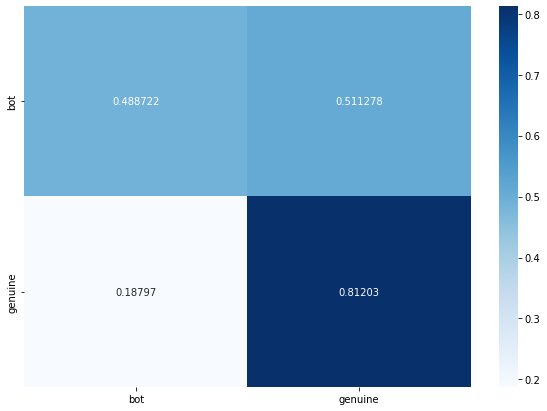

In [51]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [52]:
from sklearn.tree import DecisionTreeClassifier

DT = Pipeline([('vectorize ', CountVectorizer()), ('DT', DecisionTreeClassifier())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "DT__max_depth" : [30, 60, 120]}



clf = GridSearchCV(DT, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.88      0.79      0.83       453
     genuine       0.81      0.89      0.85       453

    accuracy                           0.84       906
   macro avg       0.84      0.84      0.84       906
weighted avg       0.84      0.84      0.84       906



In [53]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('DT', DecisionTreeClassifier(max_depth=120))])

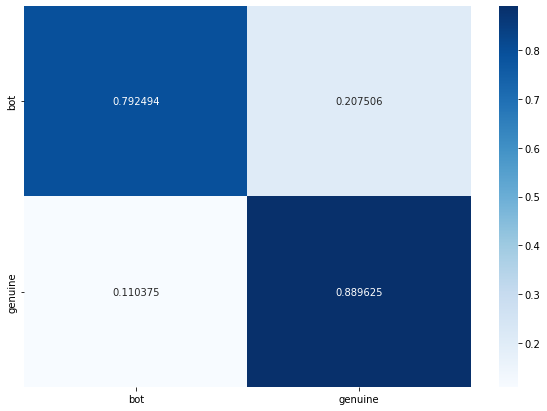

In [54]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Support vector Machines

##SSB2

In [55]:
param_grid = {'C': [10, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

from sklearn.svm import SVC

SVC = Pipeline([('vectorize ', CountVectorizer()), ('SVC', SVC())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : param_grid['C'], 'SVC__gamma': param_grid['gamma'], 'SVC__kernel': param_grid['kernel'] }



clf = GridSearchCV(SVC, parameters, cv = 4, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)

clf.fit(train_1["text"].values.astype('U'), train_1["Label"])

print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
              precision    recall  f1-score   support

         bot       0.76      0.56      0.64       133
     genuine       0.65      0.83      0.73       133

    accuracy                           0.69       266
   macro avg       0.71      0.69      0.69       266
weighted avg       0.71      0.69      0.69       266



In [56]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('SVC', SVC(C=1000, gamma=0.0001))])

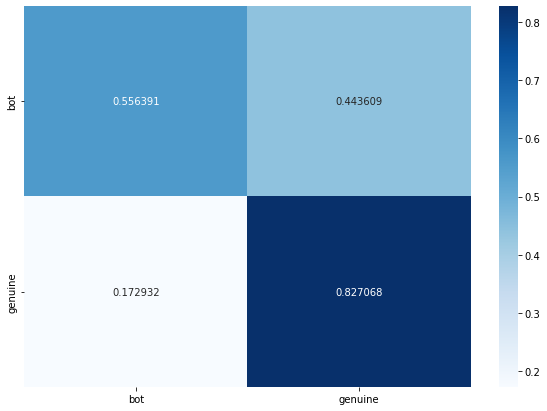

In [57]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

##SSB3

In [58]:
param_grid = {'C': [100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

from sklearn.svm import SVC

SVC = Pipeline([('vectorize ', CountVectorizer()), ('SVC', SVC())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : param_grid['C'], 'SVC__gamma': param_grid['gamma'], 'SVC__kernel': param_grid['kernel'] }



clf = GridSearchCV(SVC, parameters, cv = 4, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)

clf.fit(train_2["text"].values.astype('U'), train_2["Label"])

print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
              precision    recall  f1-score   support

         bot       0.89      0.79      0.84       453
     genuine       0.81      0.90      0.85       453

    accuracy                           0.85       906
   macro avg       0.85      0.85      0.84       906
weighted avg       0.85      0.85      0.84       906



In [59]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('SVC', SVC(C=100, gamma=0.0001))])

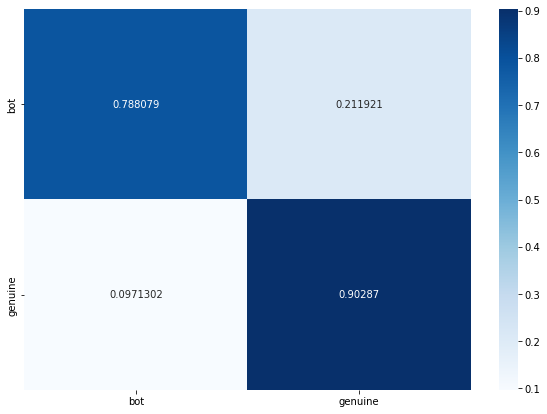

In [60]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)